# Module 1 - Exam - Part 2 - Practical

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg" width="400px" height="300px" />

> In the second part of the exam, you will set up and program some Bayesian networks according to some description. These descriptions are to be obtained from experts, in real life.
>
> Then, you will make questions (queries) to your network using functions that you will define. For this exam, you are not allowed to use inference algorithms provided by `pgmpy`. Instead, you will construct simple inference functions for you to perform queries to the net.
>
> Good luck!

> **References:**
> 
> - Probabilistic Graphical Models Specialization, offered through Coursera. Prof. Daphne Koller.
>   - Simple BN Knowledge Engineering Assignment.


<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg.</p>

___

# 1. Engineering network for credit-worthiness (50 points).

Your friend at the bank, hearing of your newfound expertise in probabilistic graphical models, asks you to help him develop a predictor for whether a person will make timely payments on his/her debt obligations, like credit card bills and loan payments. In short, your friend wants you to develop a predictor for **credit-worthiness**. He tells you that the bank is able to observe:
- the customer’s income (High, Medium, Low),
- the amount of assets the person has (High, Medium, Low),
- the person’s ratio of debts to income (Low, High),
- the person’s payment history (Excellent, Acceptable, Unacceptable),
- as well as the person’s age (Between16and21, Between22and64, Over65).

He also thinks that the credit-worthiness of a person is ultimately dependent on 
- how reliable a person is (Reliable, Unreliable),
- as well as the person’s future income (Promising, Not_promising).

He hopes that, given the eight variables above, you can help him encode into the network the following observations he has made from his experience in evaluating people’s credit-worthiness:
1. The better a person’s payment history, the more likely the person is to be reliable.
2. The older a person is, the more likely the person is to be reliable.
3. Older people are more likely to have an excellent payment history.
4. People who have a high ratio of debts to income are likely to be in financial hardship and hence less likely to have a good payment history.
5. The higher a person’s income, the more likely it is for the person to have many assets.
6. The more assets a person has and the higher the person’s income, the more likely the person is to have a promising future income.
7. All other things being equal, reliable people are more likely to be credit-worthy than unreliable people. Likewise, people who have promising future incomes, or who have low ratios of debts to income, are more likely to be credit-worthy than people who do not.

1. (20 points) Construct a network using `pgmpy`, adding appropriate edges and defining the CPDs, so that your network captures the behavior that your friend expects. Your network will be evaluated solely on whether it produces marginals that are consistent with the desired behavior and not on the actual values of the CPDs in the network. As an example, here is the condition that your network should satisfy for it to be considered consistent with observation 1: if we let $R$ denote the random variable for the reliability variable, and let $H$ denote the random variable for payment history, then your network should satisfy:

   $$P(R=Reliable|H=Excellent) > P(R=Reliable|H=Acceptable) > P(R=Reliable|H=Unacceptable).$$

In [1]:
from pgmpy.models import BayesianModel
import numpy as np
credit = BayesianModel([
    ('debt_ratio','pay_hist'),
    ('age','pay_hist'),
    ('pay_hist', 'reliable'),
    ('age','reliable'),
    ('debt_ratio','credit_worthy'),
    ('income','assets'),
    ('income','future_income'),
    ('future_income','credit_worthy'),
    ('reliable','credit_worthy'),
    ('assets','future_income')
])

AttributeError: module 'pylab' has no attribute 'show'

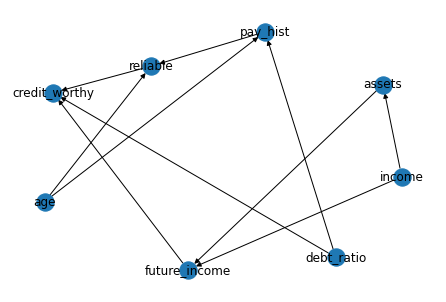

In [2]:
import networkx as nx
import pylab as plt
nx.draw(credit, with_labels=True)
plt.show()

In [74]:
from pgmpy.factors.discrete import TabularCPD
cpd_age = TabularCPD(variable='age', variable_card=3,
                  values=[[0.2],
                          [0.3],
                          [0.5]])
cpd_debt = TabularCPD(variable='debt_ratio', variable_card=2, 
                      values=[[0.7], 
                              [0.3]])
cpd_income = TabularCPD(variable='income', variable_card=3,
                  values=[[0.4],
                          [0.4],
                          [0.2]])
cpd_pay_hist = TabularCPD(variable='pay_hist', variable_card=3,
                  values=[[0.2, 0.1, 0.6, 0.1, 0.2, 0.3 ], 
                          [0.5, 0.4, 0.3, 0.2, 0.3, 0.4 ], 
                          [0.3, 0.5, 0.1, 0.7, 0.5, 0.3 ]],
                  evidence=['age','debt_ratio'],
                  evidence_card=[3,2])
cpd_assets = TabularCPD(variable='assets', variable_card=3,
                   values=[[0.5, 0.3, 0.2], 
                           [0.3, 0.5, 0.3], 
                           [0.2, 0.2, 0.5]],
                   evidence=['income'],
                   evidence_card=[3])
cpd_reliable = TabularCPD(variable='reliable', variable_card=2,
                  values=[[0.6, 0.4, 0.2, 0.7 ,0.5, 0.3, 0.9, 0.7, 0.4], 
                          [0.4, 0.6, 0.8, 0.3 ,0.5, 0.7, 0.1, 0.3, 0.6]],
                  evidence=['age','pay_hist'],
                  evidence_card=[3,3])
cpd_future_income = TabularCPD(variable='future_income', variable_card=2,
                  values=[[0.9, 0.8, 0.7, 0.6 ,0.3, 0.4, 0.4, 0.2, 0.1], 
                          [0.1, 0.2, 0.3, 0.4 ,0.7, 0.6, 0.6, 0.8, 0.9]],
                  evidence=['income','assets'],
                  evidence_card=[3,3])
cpd_credit_worthy = TabularCPD(variable='credit_worthy', variable_card=2,
                  values=[[0.9, 0.7, 0.8, 0.4 ,0.7, 0.4, 0.3, 0.1],
                            [0.1, 0.3, 0.2, 0.6 ,0.3, 0.6, 0.7, 0.9]],
                  evidence=['debt_ratio','reliable','future_income'],
                  evidence_card=[2,2,2])

In [10]:
credit.add_cpds(cpd_age,cpd_debt,cpd_income,cpd_pay_hist,cpd_assets,cpd_reliable,cpd_future_income,cpd_credit_worthy)
credit.check_model()

True

In [ ]:
#credit.get_independencies()

credit.get_cpds()[5].values

In [ ]:
credit.get_cpds()

In [ ]:
print(credit.get_cpds()[5].marginalize(variables=['income'], inplace=False))

In [11]:
p_RH = cpd_reliable.marginalize(variables=['age'], inplace=False)
p_RH0 = p_RH.reduce(values=(('pay_hist', 0),), inplace=False) #como accesar a valor especificos en las cpds?

In [12]:
print(p_RH)

+-------------+---------------------+---------------------+--------------------+
| pay_hist    | pay_hist(0)         | pay_hist(1)         | pay_hist(2)        |
+-------------+---------------------+---------------------+--------------------+
| reliable(0) | 0.7333333333333334  | 0.5333333333333333  | 0.3                |
+-------------+---------------------+---------------------+--------------------+
| reliable(1) | 0.26666666666666666 | 0.46666666666666673 | 0.7000000000000001 |
+-------------+---------------------+---------------------+--------------------+


$$P(R=Reliable|H=Excellent) = 0.733 > P(R=Reliable|H=Acceptable) = 0.533 > P(R=Reliable|H=Unacceptable) = 0.3.$$

2. (20 points) For defining the CPDs above you must have used DiscreteFactor objects or TabularCPD objects. In any case, TabularCPD objects inherit from DiscreteFactor class. As we have seen in class, `pgmpy` already provides you how to do factor product, factor marginalization and evidence observation operations.

   Based on these operations you should define two functions:
   - **compute_joint_distribution (10 points):** - This function should return a factor representing the joint distribution given a set of factors that define a Bayesian network. You may assume that you will only be given factors defining valid CPDs, so no input validation is required.
   - **compute_marginal (10 points):** This function should return the marginals over input variables (the input variables are those that remain in the marginal), given a set of factors that define a Bayesian network, and, optionally, evidence.

In [13]:
def compute_joint_distribution(cpds):
    """
    This function takes as an input an iterable of CPDs (factors)
    and returns the joint distribution defined by them, according
    to the chain rule for a Bayesian network:
                      n
    P(X1, ..., Xn) =  𝜫  P(Xi | Pa Xi).
                     i=1
    
    :param list[DiscreteFactor] cpds: list of CPDs, such that cpds[i-1] = P(Xi | Pa Xi).
    :return: DiscreteFactor corresponding the joint distribution.
    """
    f = []
    for cpd in cpds:
        f.append(cpd.to_factor())
    return np.prod(f)

In [24]:
def compute_marginal(cpds, variables, evidence = ''):
    """
    This function takes as an input an iterable of CPDs (factors),
    an iterable of variables that will remain in the marginal, and
    optionally an iterable of tuples defining the evidence.
    
    It returns the marginal conditional distribution P(variables | evidence).
    
    :param list[DiscreteFactor] cpds: list of CPDs, such that cpds[i-1] = P(Xi | Pa Xi).
    :param list[str] variables: list of variables to keep in the marginal.
    :param list[tuples] evidence: list of evidence in the form of tuples ('name_of_variable', value).
    :return: DiscreteFactor corresponding the marginal conditional distribution.
    """
    dist = compute_j0.7oint_distribution(cpds)
    dist_m = dist.marginalize(variables = variables,
                              inplace = False)
    if evidence != '' :
        dist_m = dist_m.reduce(values = evidence,
                              inplace = False)
    return dist_m.normalize(inplace= False)

In [15]:
dist = compute_joint_distribution([cpd_age,cpd_credit_worthy])
print(dist)

+--------+---------------+------------------+-------------+------------------+------------------------------------------------------------+
| age    | debt_ratio    | future_income    | reliable    | credit_worthy    |   phi(age,debt_ratio,future_income,reliable,credit_worthy) |
+========+===============+==================+=============+==================+============================================================+
| age(0) | debt_ratio(0) | future_income(0) | reliable(0) | credit_worthy(0) |                                                     0.1800 |
+--------+---------------+------------------+-------------+------------------+------------------------------------------------------------+
| age(0) | debt_ratio(0) | future_income(0) | reliable(0) | credit_worthy(1) |                                                     0.0200 |
+--------+---------------+------------------+-------------+------------------+------------------------------------------------------------+
| age(0) | debt_rati

In [16]:
test = compute_marginal([cpd_age,cpd_credit_worthy],['future_income','reliable'], [('credit_worthy',0)])

In [17]:
print(test)

+--------+---------------+-----------------------+
| age    | debt_ratio    |   phi(age,debt_ratio) |
+========+===============+=======================+
| age(0) | debt_ratio(0) |                0.5600 |
+--------+---------------+-----------------------+
| age(0) | debt_ratio(1) |                0.3000 |
+--------+---------------+-----------------------+
| age(1) | debt_ratio(0) |                0.8400 |
+--------+---------------+-----------------------+
| age(1) | debt_ratio(1) |                0.4500 |
+--------+---------------+-----------------------+
| age(2) | debt_ratio(0) |                1.4000 |
+--------+---------------+-----------------------+
| age(2) | debt_ratio(1) |                0.7500 |
+--------+---------------+-----------------------+


3. (10 points) With the above functions you have implemented a rudementary inference engine for Bayesian networks. You can use your implementation to experiment with the credit-worthiness network that you constructed in the first numeral.

    Please, perform the necessary queries to check that each of your friend's observation is correctly encoded by your network:
    1. The better a person’s payment history, the more likely the person is to be reliable.
    2. The older a person is, the more likely the person is to be reliable.
    3. Older people are more likely to have an excellent payment history.
    4. People who have a high ratio of debts to income are likely to be in financial hardship and hence less likely to have a good payment history.
    5. The higher a person’s income, the more likely it is for the person to have many assets.
    6. The more assets a person has and the higher the person’s income, the more likely the person is to have a promising future income.
    7. All other things being equal, reliable people are more likely to be credit-worthy than unreliable people. Likewise, people who have promising future incomes, or who have low ratios of debts to income, are more likely to be credit-worthy than people who do not.

In [51]:
a = compute_marginal([cpd_pay_hist,cpd_reliable],['debt_ratio','age'],[('reliable',0)])
print(a)

+-------------+-----------------+
| pay_hist    |   phi(pay_hist) |
+=============+=================+
| pay_hist(0) |          0.3810 |
+-------------+-----------------+
| pay_hist(1) |          0.3741 |
+-------------+-----------------+
| pay_hist(2) |          0.2449 |
+-------------+-----------------+


In [52]:
b = compute_marginal([cpd_age,cpd_reliable],['pay_hist'],[('reliable',0)])
print(b)

+--------+------------+
| age    |   phi(age) |
+========+============+
| age(0) |     0.1420 |
+--------+------------+
| age(1) |     0.2663 |
+--------+------------+
| age(2) |     0.5917 |
+--------+------------+


In [53]:
# Older people are more likely to have an excellent payment history.
c = compute_marginal([cpd_age,cpd_pay_hist],['debt_ratio'],[('pay_hist',0)])
print(c)

+--------+------------+
| age    |   phi(age) |
+========+============+
| age(0) |     0.1154 |
+--------+------------+
| age(1) |     0.4038 |
+--------+------------+
| age(2) |     0.4808 |
+--------+------------+


In [47]:
# People who have a high ratio of debts to income are likely to be in financial hardship and hence less likely to have a good payment history.
d = compute_marginal([cpd_debt,cpd_pay_hist],['age'],[('debt_ratio',1)])
print(d)

+-------------+-----------------+
| pay_hist    |   phi(pay_hist) |
+=============+=================+
| pay_hist(0) |          0.1667 |
+-------------+-----------------+
| pay_hist(1) |          0.3333 |
+-------------+-----------------+
| pay_hist(2) |          0.5000 |
+-------------+-----------------+


In [50]:
# The higher a person’s income, the more likely it is for the person to have many assets.
e = compute_marginal([cpd_assets,cpd_income],[],[('assets',0)])
print(e)

+-----------+---------------+
| income    |   phi(income) |
+===========+===============+
| income(0) |        0.4118 |
+-----------+---------------+
| income(1) |        0.3529 |
+-----------+---------------+
| income(2) |        0.2353 |
+-----------+---------------+


In [73]:
# The more assets a person has and the higher the person’s income, the more likely the person is to have a promising future income.
f = compute_marginal([cpd_income,cpd_assets,cpd_future_income], [], [('future_income',0)])
print(f)

+-----------+-----------+----------------------+
| income    | assets    |   phi(income,assets) |
+===========+===========+======================+
| income(0) | assets(0) |               0.2217 |
+-----------+-----------+----------------------+
| income(0) | assets(1) |               0.1182 |
+-----------+-----------+----------------------+
| income(0) | assets(2) |               0.0690 |
+-----------+-----------+----------------------+
| income(1) | assets(0) |               0.1773 |
+-----------+-----------+----------------------+
| income(1) | assets(1) |               0.1478 |
+-----------+-----------+----------------------+
| income(1) | assets(2) |               0.0788 |
+-----------+-----------+----------------------+
| income(2) | assets(0) |               0.0788 |
+-----------+-----------+----------------------+
| income(2) | assets(1) |               0.0591 |
+-----------+-----------+----------------------+
| income(2) | assets(2) |               0.0493 |
+-----------+-------

In [60]:
#All other things being equal, reliable people are more likely to be credit-worthy than unreliable people. Likewise, people who have promising future incomes, or who have low ratios of debts to income, are more likely to be credit-worthy than people who do not.
g_cpds = [cpd_credit_worthy]
g_var = ['future_income', 'debt_ratio']
evidence = [('credit_worthy',0)]
g = compute_marginal(g_cpds,g_var, evidence)
print(g)

+-------------+-----------------+
| reliable    |   phi(reliable) |
+=============+=================+
| reliable(0) |          0.6279 |
+-------------+-----------------+
| reliable(1) |          0.3721 |
+-------------+-----------------+


In [26]:
g_cpds = [cpd_credit_worthy]
g_var = ['reliable', 'debt_ratio']
evidence = [('future_income',0)]
g = compute_marginal(g_cpds,g_var, evidence)
print(g)

+------------------+----------------------+
| credit_worthy    |   phi(credit_worthy) |
+==================+======================+
| credit_worthy(0) |               0.6750 |
+------------------+----------------------+
| credit_worthy(1) |               0.3250 |
+------------------+----------------------+


In [27]:
g_cpds = [cpd_credit_worthy]
g_var = ['reliable', 'future_income']
evidence = [('debt_ratio',0)]
g = compute_marginal(g_cpds,g_var, evidence)
print(g)

+------------------+----------------------+
| credit_worthy    |   phi(credit_worthy) |
+==================+======================+
| credit_worthy(0) |               0.7000 |
+------------------+----------------------+
| credit_worthy(1) |               0.3000 |
+------------------+----------------------+


4. Optional. This numeral gives you extra points. In the case that the grade of one of your homeworks is less than 100, you have the opportunity to recover the points doing this numeral.
   
   Set up the network in SAMIAM and check that the marginals computed by SAMIAM are the same than those computed by your inference engine.